# Vehicle detection

In [86]:
# data processing
import importlib
importlib.reload(helper)

# manipulate directories and files
import os
import glob

# plotting
import matplotlib.pyplot as plt

# loading image
import matplotlib.image as mpimg

# math
import numpy as np

In [23]:
output_images_dir = 'output_images/'

## Data exploration


In order to train a classifier, we will use a dataset comprised of images taken from the [GTI vehicle image database](http://www.gti.ssr.upm.es/data/Vehicle_database.html), the [KITTI vision benchmark suite](http://www.cvlibs.net/datasets/kitti/), and examples extracted from the project video itself.

Here are links to the labeled data for [vehicle](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip) and [non-vehicle](https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip) examples to train the classifier.

In [28]:
dataset_dir = "dataset"

helper.download_extract('vehicle', dataset_dir)
helper.download_extract('non-vehicle', dataset_dir)

Found vehicle Data
Found non-vehicle Data


In [96]:
cars_path = os.path.join(dataset_dir, 'vehicles/**/*.png')
# car_path = dataset_dir + "/vehicles/**/*.png"
# car_path = "examples/*.png"
cars_images = glob.glob(car_path, recursive=True)
cars = []

# print(len(cars_images))
# print(cars_images)
for image in cars_images:
    cars.append(image)

notcars_path = os.path.join(dataset_dir, 'non-vehicles/**/*.png')
# print(notcars_path)
notcars_images = glob.glob(notcars_path, recursive=True)
notcars = []

for image in notcars_images:
    notcars.append(image)
# print(len(notcars))

In [65]:
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

The dataset contains 8792 cars and 8968 non-cars
of size:  (64, 64, 3)  and data type: float32


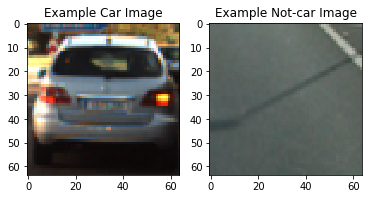

In [110]:
data_info = data_look(cars, notcars)

print('The dataset contains', 
      data_info["n_cars"], 'cars and', 
      data_info["n_notcars"], 'non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images# READ IN CAR / NOT-CAR IMAGES


car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
filename = output_images_dir + "car_notcar_example.png"
plt.savefig(filename)
plt.show()
